In [1]:
 from sklearn import datasets
In [2]: from sklearn import model_selection
In [3]: from sklearn import linear_model
In [4]: from sklearn import metrics
In [5]: from sklearn import tree
In [6]: from sklearn import neighbors
In [7]: from sklearn import svm
In [8]: from sklearn import ensemble
In [9]: from sklearn import cluster

In [2]:
import matplotlib.pyplot as plt
In [11]: import numpy as np

In [3]:
import seaborn as sns

In [4]:
X_all, y_all = datasets.make_regression(n_samples=50,n_features=50, n_informative=10)

In [6]:
X_train, X_test, y_train, y_test = \
...: model_selection.train_test_split(X_all, y_all, train_size=0.5)

In [7]:
 model = linear_model.LinearRegression()

In [9]:
 model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
 def sse(resid):
        return np.sum(resid**2)
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

2.0252520683047663e-24

In [13]:
resid_test = y_test - model.predict(X_test)
...: sse_test = sse(resid_test)
...: sse_test
    

423261.1305569939

In [14]:
 model.score(X_train, y_train)

1.0

In [15]:
 model.score(X_test, y_test)

0.4222531905935795

In [17]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

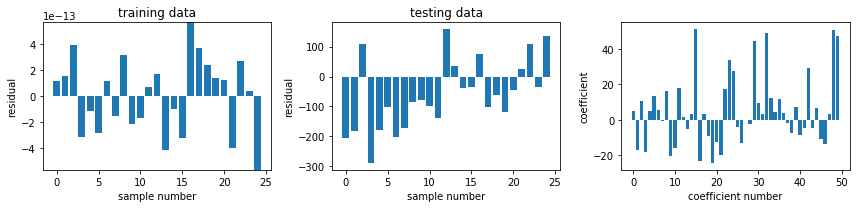

In [18]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test,
model.coef_)

In [19]:
 model = linear_model.Ridge(alpha=2.5)

In [20]:
 model.fit(X_train, y_train)

Ridge(alpha=2.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
resid_train = y_train - model.predict(X_train)
...: sse_train = sse(resid_train)
...: sse_train

4327.601525660981

In [22]:
resid_test = y_test - model.predict(X_test)
...: sse_test = sse(resid_test)
...: sse_test

401657.48625363293

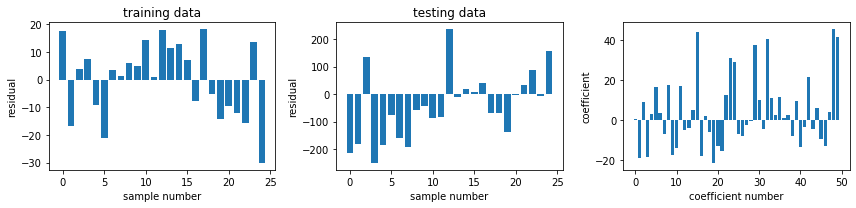

In [23]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test,
model.coef_)

In [24]:
 model = linear_model.Lasso(alpha=1.0)
In [30]: model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
 resid_train = y_train - model.predict(X_train)
...: sse_train = sse(resid_train)
...: sse_train

535.356151090112

In [26]:
 resid_test = y_test - model.predict(X_test)
...: sse_test = sse(resid_test)
...: sse_test

75662.73334158129

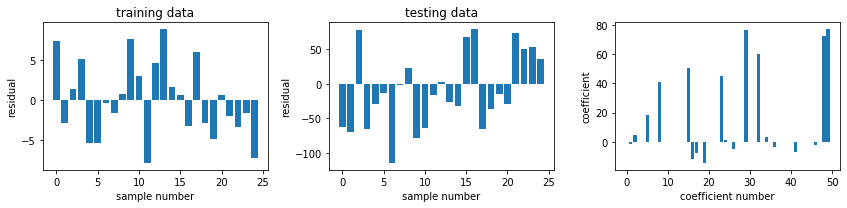

In [27]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test,
model.coef_)

In [28]:
alphas = np.logspace(-4, 2, 100)
In [35]: coeffs = np.zeros((len(alphas), X_train.shape[1]))
In [36]: sse_train = np.zeros_like(alphas)
In [37]: sse_test = np.zeros_like(alphas)

In [30]:
for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    sse_train[n] = sse(y_train - model.predict(X_train))
    sse_test[n] = sse(y_test - model.predict(X_test))

D:\Download\python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103.36138900588685, tolerance: 93.34431968174748
  positive)
D:\Download\python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.67269758506445, tolerance: 93.34431968174748
  positive)
D:\Download\python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125.73415722401374, tolerance: 93.34431968174748
  positive)
D:\Download\python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.20906528404987, t

Text(0, 0.5, 'sse')

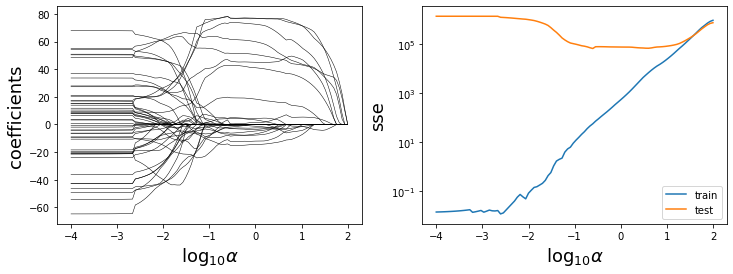

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)

In [32]:
model = linear_model.LassoCV()
In [41]: model.fit(X_all, y_all)

D:\Download\python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [33]:
 model.alpha_

0.09975272471179769

In [34]:
 resid_train = y_train - model.predict(X_train)
...: sse_train = sse(resid_train)
...: sse_train

2.827514022982319

In [35]:
 resid_test = y_test - model.predict(X_test)
...: sse_test = sse(resid_test)
...: sse_test

3.291171387502005

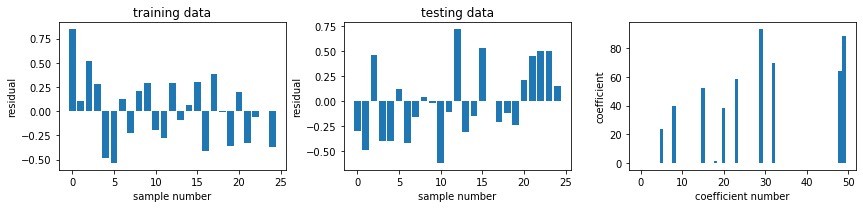

In [36]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test,
model.coef_)

In [37]:
 model = linear_model.ElasticNetCV()
In [47]: model.fit(X_train, y_train)

D:\Download\python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [38]:
 model.alpha_

12.141851133651668

In [39]:
 model.l1_ratio

0.5

In [40]:
 resid_train = y_train - model.predict(X_train)
...: sse_train = sse(resid_train)
...: sse_train

496434.6371038077

In [41]:
 resid_test = y_test - model.predict(X_test)
...: sse_test = sse(resid_test)
...: sse_test

600258.7373498171

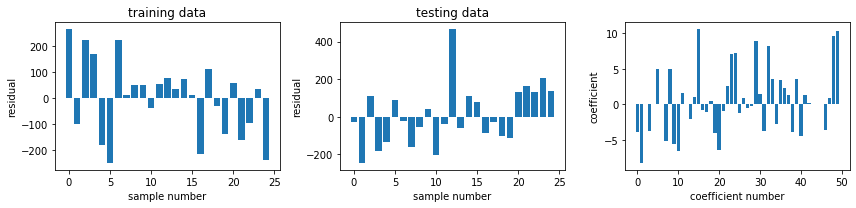

In [42]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test,
model.coef_)

In [43]:
 iris = datasets.load_iris()
In [54]: type(iris)

sklearn.utils.Bunch

In [44]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [45]:
 iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [46]:
iris.data.shape

(150, 4)

In [47]:
 iris.target.shape

(150,)

In [48]:
 X_train, X_test, y_train, y_test = \
...: model_selection.train_test_split(iris.data, iris.target,
train_size=0.7)

In [49]:
 classifier = linear_model.LogisticRegression()

In [50]:
 classifier.fit(X_train, y_train)

D:\Download\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Download\python\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
 y_test_pred = classifier.predict(X_test)

In [52]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [53]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[12,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 16]], dtype=int64)

In [54]:
np.bincount(y_test)

array([12, 17, 16], dtype=int64)

In [55]:
classifier = tree.DecisionTreeClassifier()
...: classifier.fit(X_train, y_train)
...: y_test_pred = classifier.predict(X_test)
...: metrics.confusion_matrix(y_test, y_test_pred)

array([[12,  0,  0],
       [ 0, 16,  1],
       [ 0,  2, 14]], dtype=int64)

In [56]:
 train_size_vec = np.linspace(0.1, 0.9, 30)

In [59]:
classifiers = [tree.DecisionTreeClassifier,neighbors.KNeighborsClassifier,svm.SVC,ensemble.RandomForestClassifier]

In [60]:
 cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)),
dtype=float)

In [61]:
 for n, train_size in enumerate(train_size_vec):
        X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target,train_size=train_size)

In [63]:
for m, Classifier in enumerate(classifiers):
    classifier = Classifier()
    classifier.fit(X_train, y_train)
    y_test_p = classifier.predict(X_test)
    cm_diags[:, n, m] = metrics.confusion_matrix(y_test,y_test_p).diagonal()
    cm_diags[:, n, m] /= np.bincount(y_test)

D:\Download\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Download\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


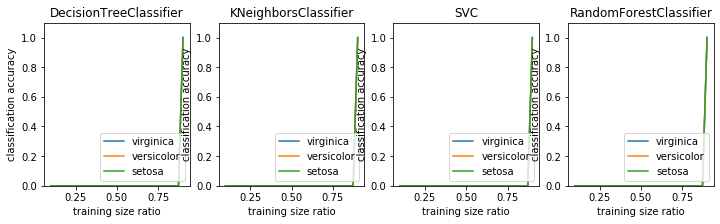

In [64]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))
for m, Classifier in enumerate(classifiers):
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

In [65]:
X, y = iris.data, iris.target

In [66]:
 n_clusters = 3
In [74]: clustering = cluster.KMeans(n_clusters=n_clusters)

In [67]:
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
 y_pred = clustering.predict(X)

In [69]:
y_pred[::8]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [70]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [71]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
In [80]: y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1
In [81]: y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [72]:
 metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 36, 14]], dtype=int64)

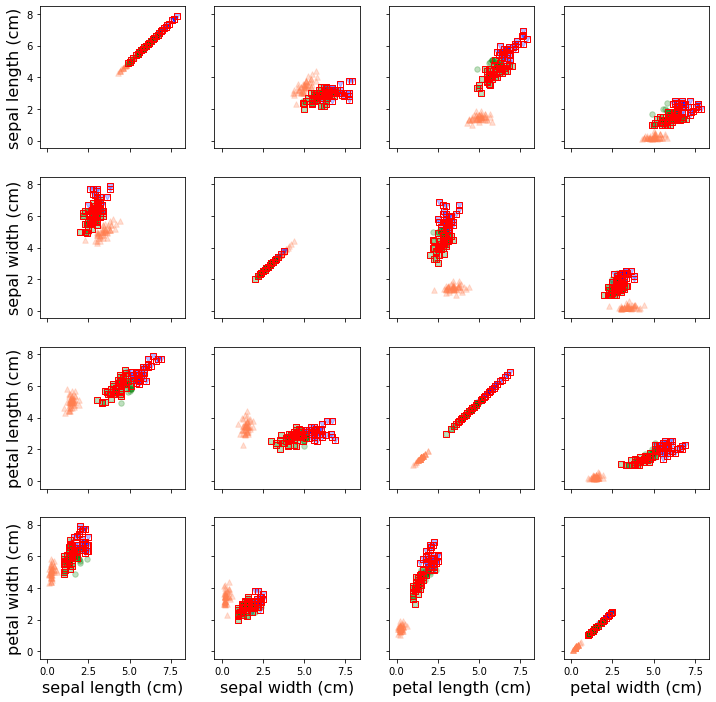

In [73]:
N = X.shape[1]
fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True,sharey=True)
colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask], s=30,marker=markers[p], color=colors[p],alpha=0.25)
        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n], s=30,marker="s", edgecolor="red",facecolor=(1,1,1,0))
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)